<a href="https://colab.research.google.com/github/GustGon/I.A.Python/blob/master/neural-network/nn-recurrent/LTMS_acoesIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
# TensorFlow e tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Imports de biblioteca
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [0]:
#Carregar dataset
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [0]:
dataset.shape

(3020, 6)

In [0]:
dataset.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [0]:
dataset[:'2016'].iloc[:, 3].values

array([ 82.06,  81.95,  82.5 , ..., 166.19, 166.6 , 165.99])

In [0]:
#Separando treino de teste
training_set = dataset[:'2016'].iloc[:,3].values
test_set = dataset['2017':].iloc[:,3].values

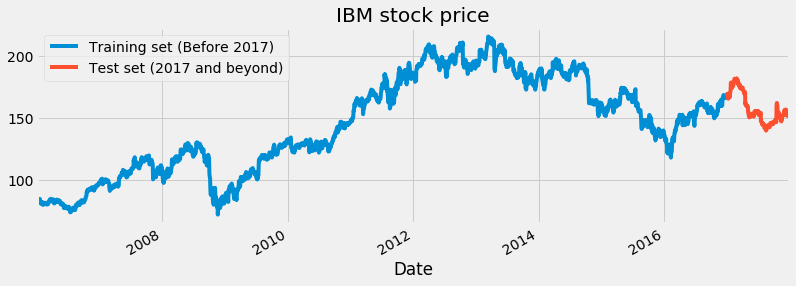

In [0]:
dataset["Close"][:'2016'].plot(figsize=(12,4),legend=True)
dataset["Close"]['2017':].plot(legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [0]:
#Normalizar os dados
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
test_set = test_set.reshape(-1,1)
training_set_norm = sc.fit_transform(training_set)
test_set_norm = sc.fit_transform(test_set)

In [0]:
training_set_norm.shape

(2769, 1)

In [0]:
X_train = []
y_train = []
for i in range (60, 2769):
  X_train.append( training_set_norm[ i-60:i, 0 ] )
  y_train.append( training_set_norm[ i, 0 ])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
y_train.shape

(2709,)

In [0]:
#Reshaping os valores de X
X_train_3D = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [0]:
X_train_3D.shape

(2709, 60, 1)

In [0]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=10, return_sequences=True, input_shape=(X_train_3D.shape[1], 1)))
regressor.add(Dropout(0.25))
# Second LSTM layer
regressor.add(LSTM(units=10, return_sequences=True))
regressor.add(Dropout(0.25))
# Third LSTM layer
regressor.add(LSTM(units=10, return_sequences=True))
regressor.add(Dropout(0.25))
# Fourth LSTM layer
regressor.add(LSTM(units=10))
regressor.add(Dropout(0.25))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mse','mae'])
# Fitting to the training set
historico = regressor.fit(X_train_3D,y_train,epochs=50,batch_size=32)

Train on 2709 samples
Epoch 1/50
2709/2709 [==============================] - 15s 5ms/sample - loss: 0.0405 - mse: 0.0405 - mae: 0.1381
Epoch 2/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0176 - mse: 0.0176 - mae: 0.0976
Epoch 3/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0142 - mse: 0.0142 - mae: 0.0861
Epoch 4/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0114 - mse: 0.0114 - mae: 0.0778
Epoch 5/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0108 - mse: 0.0108 - mae: 0.0755
Epoch 6/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0095 - mse: 0.0095 - mae: 0.0706
Epoch 7/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0089 - mse: 0.0089 - mae: 0.0686
Epoch 8/50
2709/2709 [==============================] - 5s 2ms/sample - loss: 0.0078 - mse: 0.0078 - mae: 0.0643
Epoch 9/50
2709/2709 [==============================] - 5s 2ms/sample - l

DropOut - Retira x% dos numeros de neuronios para nao viciar os pessos.

Return sequences apenas de rede recorrente para rede recorrente.

Optimizer mais usados - rmsprop e xxxxxxx

In [0]:
historico.history.keys()

dict_keys(['loss', 'mse', 'mae'])

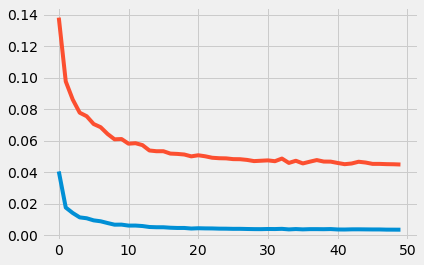

In [0]:
plt.plot( historico.history['mse'] )
plt.plot( historico.history['mae'] )

Dicas sobre a convergencia do algoritimo.

Learning Rate; Decaimento; numero de epocas

In [0]:
#Vamos testar com os dados de teste, lembrando que os valores de testes são também os resultados
#Para a primeira previsão com os dados de teste precisamos pegar 60 valores anteriores, só que para isso precisamos de todo dataset
dataset_total = pd.concat((dataset["Close"][:'2016'],dataset["Close"]['2017':]),axis=0)
inputs = dataset_total[ len(dataset_total)-len(test_set) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [0]:
#Preparando X de teste para prever as ações
X_test = []
for i in range(60,311):
    X_test.append( inputs[ i-60:i, 0 ] )
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [0]:
predicted_stock_price = regressor.predict(X_test)

In [0]:
predicted_stock_price[:10]

array([[0.6717638 ],
       [0.6673608 ],
       [0.66588163],
       [0.668228  ],
       [0.6746715 ],
       [0.6834943 ],
       [0.69153047],
       [0.6976056 ],
       [0.7015846 ],
       [0.70347667]], dtype=float32)

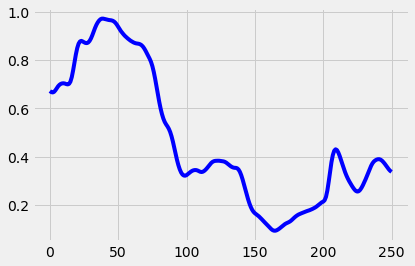

In [0]:
plt.plot(predicted_stock_price, color='blue',label='Predicted IBM Stock Price')

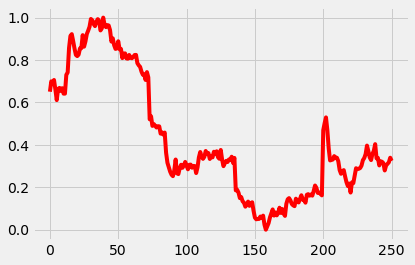

In [0]:
plt.plot(test_set_norm, color='red',label='Real IBM Stock Price')

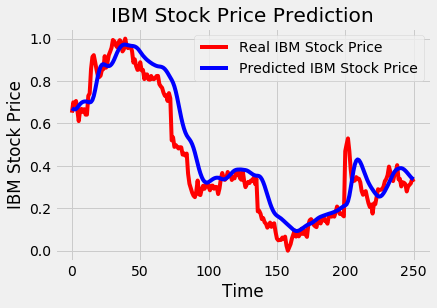

In [0]:
plt.plot(test_set_norm, color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()